<h1 align="center"><strong>Buddy Bass Fishing Tournament</strong></h1>

<div align="center"><img src="images/PB040066.JPG" height="750" /></div>

<p align="center">Pictured: Sam and Bob Perry</p>

The Buddy Bass Tournament on Williamstown Lake was started in 1985 by twin brothers: Bob and Sam Perry. They held their final tournament season in 2020.  


In this notebook, I'll take a look at the dataset from the Buddy Bass Tournament 2020 Season to try to *insert what I'm going to do here*. I will use the following dataset: dataset/Buddy_Bass_Tournament_2020.xlsx, that I received from my dad, Sam Perry.

Dataset:
The dataset I'll use is an excel spreadsheet with data collected from the weekly fishing tournament.

<h2><strong>1. Read the Data In</strong></h2>

This is where I import any needed Python libraries and all datasets I'll use in this notebook.

In [43]:
# Import libraries
from matplotlib import pyplot as plt
import pandas as pd


# Column of dates to parse
date_col = ["Date"]

# Read the Excel file for the 2020 tournament and skip 2 rows so dataframe starts with the column headers
buddy_bass_tournament20 = pd.read_excel("data/Buddy_Bass_Tournament_2020.xlsx", skiprows = 2)

In [44]:
# View the first five rows of data
buddy_bass_tournament20.head()

,Date,Number of Boats,Total No of Fish Caught,Total Weight in Pounds,Big Fish (LBS),Avg Water Temp,Big Fish/Year (LBS)
0,2020-06-03,25.0,28.0,46.20,4.56,NaN,NaN
1,2020-06-10,28.0,71.0,105.98,4.80,NaN,NaN
2,2020-06-24,29.0,49.0,77.00,4.32,75.2,Wieda/Young 5.48 *
3,2020-07-01,33.0,61.0,83.86,5.26,76.8,""""
4,2020-07-08,26.0,50.0,74.30,4.50,76.8,""""


<h2><strong>2. Manipulate and Clean the Data</strong></h2>
<p>I noticed after reading in the dataset that:</p>
<ol>
<li>The dates in the "Date" column need to start on 2020-06-10 instead of 2022-06-03</li>
<li>I didn't need the "Big Fish/Year (LBS)" or "Avg Water Temp" columns</li>
<li>The dataset had NaNs (Not a Number) appearing in several columns
</ol>

<h3><strong>1. Fix the dates in the "Date" column</strong></h3>

In [45]:
# Create date range that starts on 06/10/2022 and then every Wednesday for the next 15 periods
dates = pd.Series(pd.date_range("06/10/2020", freq="W-WED", periods=15))

print(dates)

0    2020-06-10
1    2020-06-17
2    2020-06-24
3    2020-07-01
4    2020-07-08
5    2020-07-15
6    2020-07-22
7    2020-07-29
8    2020-08-05
9    2020-08-12
10   2020-08-19
11   2020-08-26
12   2020-09-02
13   2020-09-09
14   2020-09-16
dtype: datetime64[ns]


In [46]:
# Replace "Date" column with date series 
buddy_bass_tournament20["Date"] = dates

# View "Date" column to verify date series was added to column
print(buddy_bass_tournament20[["Date"]])

         Date
0  2020-06-10
1  2020-06-17
2  2020-06-24
3  2020-07-01
4  2020-07-08
5  2020-07-15
6  2020-07-22
7  2020-07-29
8  2020-08-05
9  2020-08-12
10 2020-08-19
11 2020-08-26
12 2020-09-02
13 2020-09-09
14 2020-09-16


In [47]:
# View buddy_bass_tournament20 to verify dates were correctly added to "Dates" column
print(buddy_bass_tournament20)

         Date  Number of Boats  Total No of Fish Caught  \
0  2020-06-10             25.0                     28.0   
1  2020-06-17             28.0                     71.0   
2  2020-06-24             29.0                     49.0   
3  2020-07-01             33.0                     61.0   
4  2020-07-08             26.0                     50.0   
5  2020-07-15             29.0                     54.0   
6  2020-07-22             32.0                     48.0   
7  2020-07-29             31.0                     56.0   
8  2020-08-05             37.0                     71.0   
9  2020-08-12             31.0                     33.0   
10 2020-08-19             28.0                     58.0   
11 2020-08-26             30.0                     33.0   
12 2020-09-02              NaN                      NaN   
13 2020-09-09              NaN                      NaN   
14 2020-09-16             27.0                     84.0   

    Total Weight in Pounds  Big Fish (LBS)  Avg Water T

<h3><strong>2. Drop the "Big Fish/Year (LBS)" and "Avg Water Temp" columns</strong></h3>

In [48]:
# Drop the "Big Fish/Year (LBS)" and "Avg Water Temp" columns and set the dataframe to buddy_bass_2020 variable
buddy_bass_2020 = buddy_bass_tournament20.drop(columns=['Big Fish/Year (LBS)', "Avg Water Temp"])

# View first five rows of data to confirm that the column is gone
buddy_bass_2020.head()

,Date,Number of Boats,Total No of Fish Caught,Total Weight in Pounds,Big Fish (LBS)
0,2020-06-10,25.0,28.0,46.20,4.56
1,2020-06-17,28.0,71.0,105.98,4.80
2,2020-06-24,29.0,49.0,77.00,4.32
3,2020-07-01,33.0,61.0,83.86,5.26
4,2020-07-08,26.0,50.0,74.30,4.50


<h3><strong>3. Replace the NaNs in the dataset with 0</strong></h3>

In [49]:
# Fill all NaN in dataset with 0
buddy_bass_2020 = buddy_bass_2020.fillna(0)

<h2><strong>3. Analyze the Data</strong></h2>

In [50]:
# Display information about the columns including data type and number of any missing values
buddy_bass_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     15 non-null     datetime64[ns]
 1   Number of Boats          15 non-null     float64       
 2   Total No of Fish Caught  15 non-null     float64       
 3   Total Weight in Pounds   15 non-null     float64       
 4   Big Fish (LBS)           15 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 728.0 bytes


In [51]:
# Return the number of rows and columns in the data
buddy_bass_2020.shape

(15, 5)

In [52]:
# Display a summary of statistics calculated for each column
buddy_bass_2020.describe()

,Number of Boats,Total No of Fish Caught,Total Weight in Pounds,Big Fish (LBS)
count,15.000000,15.000000,15.000000,15.000000
mean,25.733333,46.400000,65.618667,3.718667
std,10.859273,24.124084,35.131072,1.742289
min,0.000000,0.000000,0.000000,0.000000
25%,26.500000,33.000000,47.320000,3.100000
50%,29.000000,50.000000,74.300000,4.320000
75%,31.000000,59.500000,80.430000,4.680000
max,37.000000,84.000000,125.420000,5.440000


In [53]:
# Creates an index of the column names
buddy_bass_2020.columns

Index(['Date', 'Number of Boats', 'Total No of Fish Caught',
       'Total Weight in Pounds', 'Big Fish (LBS)'],
      dtype='object')

In [54]:
# Create a new column called "Average Fish Weight" with the data from calculating the average fish weight
buddy_bass_2020["Average Fish Weight"] = buddy_bass_2020["Total Weight in Pounds"] / buddy_bass_2020["Total No of Fish Caught"]

# 
print(buddy_bass_2020.head())

        Date  Number of Boats  Total No of Fish Caught  \
0 2020-06-10             25.0                     28.0   
1 2020-06-17             28.0                     71.0   
2 2020-06-24             29.0                     49.0   
3 2020-07-01             33.0                     61.0   
4 2020-07-08             26.0                     50.0   

   Total Weight in Pounds  Big Fish (LBS)  Average Fish Weight  
0                   46.20            4.56             1.650000  
1                  105.98            4.80             1.492676  
2                   77.00            4.32             1.571429  
3                   83.86            5.26             1.374754  
4                   74.30            4.50             1.486000  


In [64]:
# Display only the "Number of Boats" and "Total No of Fish Caught" columns
buddy_bass_2020[["Number of Boats", "Total No of Fish Caught"]]

,Number of Boats,Total No of Fish Caught
0,25.0,28.0
1,28.0,71.0
2,29.0,49.0
3,33.0,61.0
4,26.0,50.0
5,29.0,54.0
6,32.0,48.0
7,31.0,56.0
8,37.0,71.0
9,31.0,33.0


In [56]:
# Display all the times "Number of Boats" was less than 30
buddy_bass_2020[buddy_bass_2020["Number of Boats"] < 30]

,Date,Number of Boats,Total No of Fish Caught,Total Weight in Pounds,Big Fish (LBS),Average Fish Weight
0,2020-06-10,25.0,28.0,46.20,4.56,1.650000
1,2020-06-17,28.0,71.0,105.98,4.80,1.492676
2,2020-06-24,29.0,49.0,77.00,4.32,1.571429
4,2020-07-08,26.0,50.0,74.30,4.50,1.486000
5,2020-07-15,29.0,54.0,68.27,4.26,1.264259
10,2020-08-19,28.0,58.0,75.42,4.46,1.300345
12,2020-09-02,0.0,0.0,0.00,0.00,NaN
13,2020-09-09,0.0,0.0,0.00,0.00,NaN
14,2020-09-16,27.0,84.0,125.42,4.28,1.493095


In [63]:
# Find the median of the "Total No of Fish Caught" column
buddy_bass_2020["Total No of Fish Caught"].median()

50.0

In [58]:
# Add a new column "Month" that turns the "Date" column into only the month name
buddy_bass_2020["Month"] = buddy_bass_2020["Date"]\
    .dt.month_name()

print(buddy_bass_2020.head())


        Date  Number of Boats  Total No of Fish Caught  \
0 2020-06-10             25.0                     28.0   
1 2020-06-17             28.0                     71.0   
2 2020-06-24             29.0                     49.0   
3 2020-07-01             33.0                     61.0   
4 2020-07-08             26.0                     50.0   

   Total Weight in Pounds  Big Fish (LBS)  Average Fish Weight Month  
0                   46.20            4.56             1.650000  June  
1                  105.98            4.80             1.492676  June  
2                   77.00            4.32             1.571429  June  
3                   83.86            5.26             1.374754  July  
4                   74.30            4.50             1.486000  July  


In [59]:
# Group data by "Month" and calculate the sum for "Number of Boats", "Total No of Fish Caught", and "Total Weight in Pounds" by month
buddy_bass_bar = buddy_bass_2020.groupby("Month", sort=False)[["Number of Boats", "Total No of Fish Caught", "Total Weight in Pounds"]].sum()

print(buddy_bass_bar)

           Number of Boats  Total No of Fish Caught  Total Weight in Pounds
Month                                                                      
June                  82.0                    148.0                  229.18
July                 151.0                    269.0                  361.50
August               126.0                    195.0                  268.18
September             27.0                     84.0                  125.42


In [66]:
# Create a For Loop that populates an empty list with corresponding colors to be used in the Scatterplot

# Define an empty list
colors = []

# Iterate over rows of buddy_bass_month
for lab, row in buddy_bass_2020[["Month"]].iterrows() :
    if row["Month"] == "June" :
        colors.append("green")
    elif row["Month"] == "July" :
        colors.append("blue")
    elif row["Month"] == "August" :
        colors.append("purple") 
    else:
        colors.append("red")

# Print the colors list to make sure the For Loop worked correctly
print(colors)        

['green', 'green', 'green', 'blue', 'blue', 'blue', 'blue', 'blue', 'purple', 'purple', 'purple', 'purple', 'red', 'red', 'red']


<h2><strong>4. Visualize the Data</strong></h2>

<h3><strong>1. Scatterplot</strong></h3>

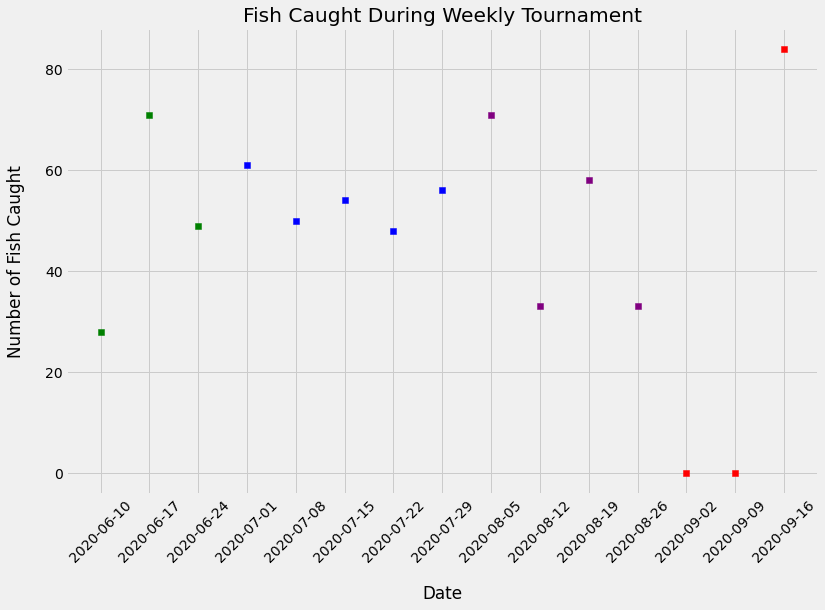

In [61]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of Total No of Fish Caught versus Date
plt.scatter(buddy_bass_2020.Date, buddy_bass_2020["Total No of Fish Caught"], marker="s", color=colors)

# Create a title and axis labels
plt.title("Fish Caught During Weekly Tournament")
plt.xlabel("Date", labelpad=20)
plt.xticks(buddy_bass_2020.Date, rotation=45)
plt.ylabel("Number of Fish Caught", labelpad=20)

# Show the plot
plt.show()

<h3><strong>2. Bar Plot</strong></h3>

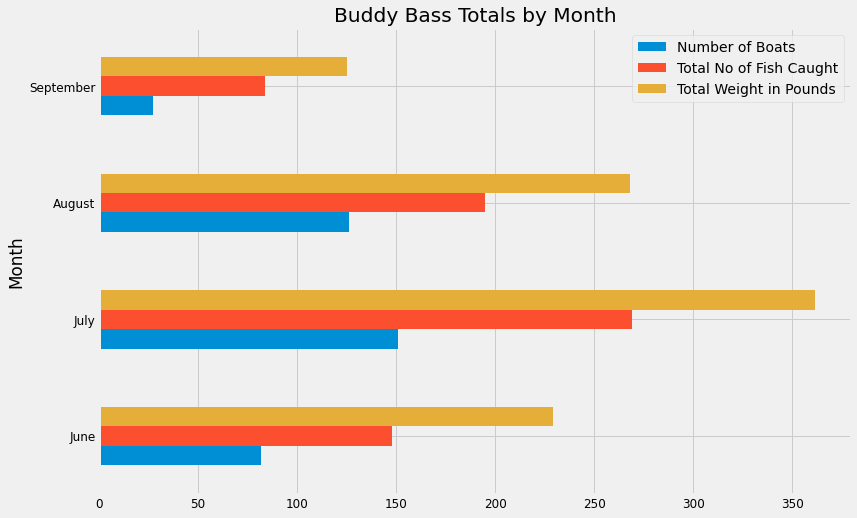

In [62]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (12, 8)

# Create a bar plot of total Number of Boats, No of Fish Caught, and Weight in Pounds by Month
buddy_bass_bar.plot(kind="barh", fontsize=12)

# Create a title and axis labels
plt.title("Buddy Bass Totals by Month")

# Show the plot
plt.show()

<h2><strong>5. Interpret the Data and Graphical Output</strong></h2>
<p>July had the most: Number of Boats, Total No of Fish Caught, and Total Weight in Pounds.</p>
<p>September had the least: Number of Boats, Total No of Fish Caught, and Total Weight in Pounds because there was only one Buddy Bass Tournament for the month.</p>